In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
with open(r"C:/Users/SAIDHANUSH/naivee.csv") as f:
    for i in f: print(str(i.encode('utf-8').strip()))





b'rating,date,variation,reviews,feedback'
b'5,31-Jul-18,Charcoal Fabric ,Love my Echo!,1'
b'5,31-Jul-18,Charcoal Fabric ,Loved it!,1'
b'4,31-Jul-18,Walnut Finish ,"Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.",1'
b'5,31-Jul-18,Charcoal Fabric ,"I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.",1'
b'5,31-Jul-18,Charcoal Fabric ,Music,1'
b'5,31-Jul-18,Heather Gray Fabric ,"I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can\xe2\x80\x99t wait to see what else it can do.",1'
b'3,31-Jul-18,Sandstone Fabric ,"Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm

b'5,30-Jul-18,Black  Show,Great in the kitchen.  I love to cook and it is fun to look up recipes.  Also great for listening to music and watching shows on Amazon Prime Video while I cook.  I subsequently bought an Echo Dot with the ihome clock docking station for the bedroom.  I created a group so I can play music on both of them at the same time.  I plan to add more speakers in the future.,1'
b'5,30-Jul-18,Black  Show,"Excellent quality, very good sound, great deal on Prime Day.",1'
b"4,30-Jul-18,Black  Show,So far so good.  Neat to have a visual version of alexa's responses. Nice to see the lyrics of music you are listening to.  Flash briefings have good videos.  Speaker is much better than a dot but not the highest quality,1"
b'5,30-Jul-18,Black  Show,It\xe2\x80\x99s fun,1'
b'5,30-Jul-18,Black  Show,fun so far. learning to use her.,1'
b'5,30-Jul-18,Black  Show,works great.. nice sound and picture,1'
b'5,30-Jul-18,White  Show,"This product is even better than I imagined. I love the t

In [3]:
df=pd.read_csv(r'C:/Users/SAIDHANUSH/naivee.csv',encoding='latin1') 

In [4]:
df.head()

,rating,date,variation,reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [6]:
train_qs = pd.Series(df['reviews'].tolist()).astype(str)

In [9]:
!pip install wordcloud

(-0.5, 1439.5, 1079.5, -0.5)

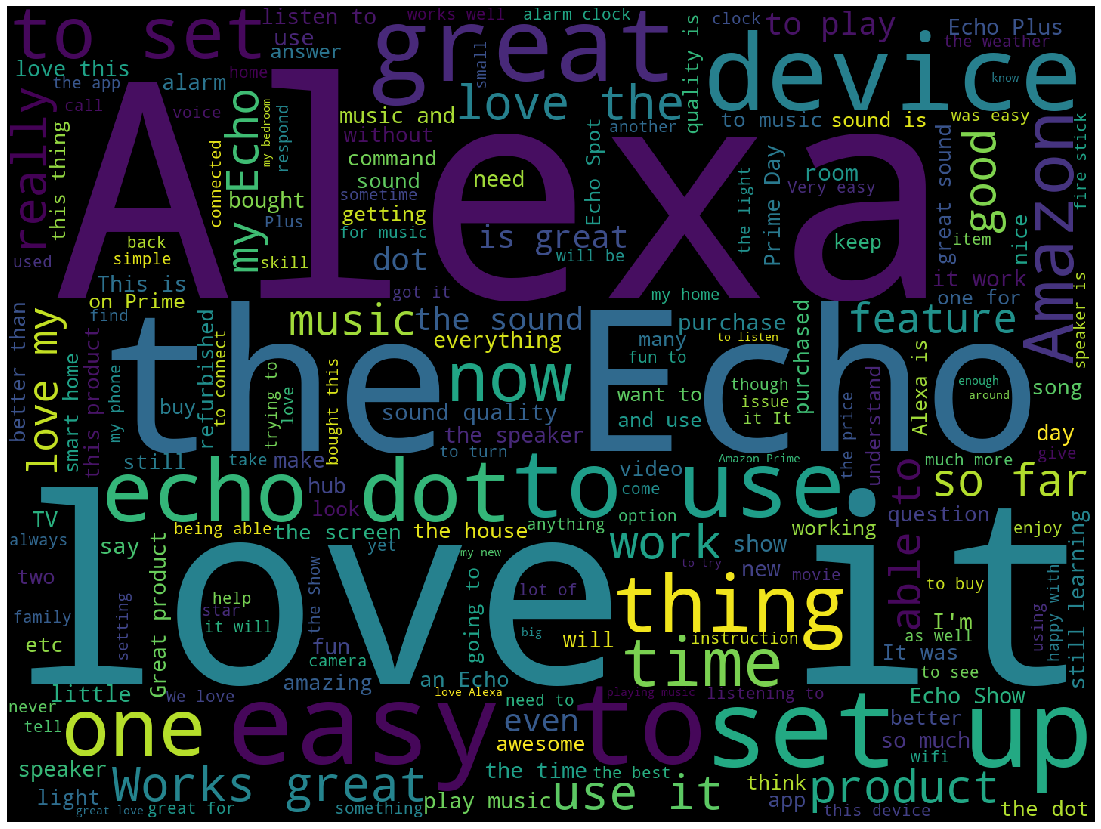

In [13]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

In [32]:
df['reviews'].replace({',',' .'},inplace=True)

In [33]:
stopset=set(stopwords.words('english'))
vector=TfidfVectorizer(use_idf=True,lowercase=True,strip_accents='ascii',stop_words=stopset)

In [34]:
vector.fit(df)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...},
                strip_accents='ascii', sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

In [35]:
y=df.feedback
x=vector.fit_transform(df.reviews)


In [39]:
x.shape


(3150, 3934)

In [41]:
y.shape

(3150,)

In [42]:
np.array(x)

array(<3150x3934 sparse matrix of type '<class 'numpy.float64'>'
	with 36427 stored elements in Compressed Sparse Row format>, dtype=object)

In [43]:
print(x)

  (0, 1129)	0.7523011600720021
  (0, 2097)	0.6588193717205952
  (1, 2098)	1.0
  (2, 1676)	0.17505540222474666
  (2, 356)	0.2581675313738413
  (2, 2022)	0.2062649813385942
  (2, 3630)	0.2132613677549383
  (2, 80)	0.20020443575708508
  (2, 2023)	0.1351539264303775
  (2, 252)	0.2750315648114222
  (2, 3899)	0.2851593080887078
  (2, 1534)	0.18972890018431723
  (2, 2985)	0.2614108159671428
  (2, 193)	0.1303199441004053
  (2, 831)	0.30216539695515104
  (2, 2721)	0.2851593080887078
  (2, 249)	0.2551406318028975
  (2, 1471)	0.3611355282016857
  (2, 2567)	0.22368098774533512
  (2, 3213)	0.24472101181250067
  (3, 3830)	0.17760800214481776
  (3, 2262)	0.12878393470221391
  (3, 3232)	0.1467807462261653
  (3, 2313)	0.19974809237279473
  (3, 597)	0.37018889427430934
  :	:
  (3148, 2244)	0.19450827841936208
  (3148, 1930)	0.20374242347497584
  (3148, 3431)	0.18258166878312082
  (3148, 1684)	0.19789018635831337
  (3148, 1084)	0.23306836842419332
  (3148, 1449)	0.17146674260119657
  (3148, 1444)	0.20374

In [45]:
vector.get_feature_names()[1129]

'echo'

In [46]:
max(vector.get_feature_names())

'zzzzzzz'

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [48]:
clf = naive_bayes.MultinomialNB()
model=clf.fit(x_train, y_train)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [51]:
df.loc[34]

rating                             5
date                       30-Jul-18
variation           Charcoal Fabric 
reviews      This device is awesome!
feedback                           1
Name: 34, dtype: object

In [53]:
predicted_class[34]

1

In [54]:
rd=model.predict_proba(x_test)

In [55]:
rd

array([[1.06430012e-03, 9.98935700e-01],
       [3.10258858e-03, 9.96897411e-01],
       [7.79000847e-02, 9.22099915e-01],
       ...,
       [4.98442063e-03, 9.95015579e-01],
       [7.92709861e-04, 9.99207290e-01],
       [5.51478231e-03, 9.94485218e-01]])

In [56]:
clf.predict_proba(x_test)[:,1]

array([0.9989357 , 0.99689741, 0.92209992, 0.98569899, 0.99264807,
       0.99126896, 0.98237511, 0.9864135 , 0.99295144, 0.99787238,
       0.67805917, 0.9911042 , 0.97434364, 0.98944938, 0.99722305,
       0.97560282, 0.99862125, 0.9920172 , 0.99290253, 0.95797223,
       0.99805454, 0.8973433 , 0.99647254, 0.85266787, 0.98880596,
       0.98430685, 0.99018312, 0.998431  , 0.98510448, 0.97407347,
       0.99426063, 0.97284056, 0.99793571, 0.98581542, 0.98991731,
       0.9970248 , 0.99212636, 0.98521631, 0.99846003, 0.99064845,
       0.98803831, 0.96554117, 0.9293254 , 0.99702958, 0.998431  ,
       0.97119255, 0.99581112, 0.99547755, 0.99724944, 0.97067098,
       0.9982087 , 0.9551537 , 0.95108534, 0.99898259, 0.94608347,
       0.99449249, 0.99021262, 0.96090537, 0.90042922, 0.9990713 ,
       0.9993975 , 0.99113416, 0.99033255, 0.99908   , 0.98964839,
       0.99845488, 0.99336011, 0.99823073, 0.9943323 , 0.99639223,
       0.92209992, 0.99384145, 0.99825724, 0.99547755, 0.99699

In [58]:
roc_auc_score(y_test, clf.predict_proba(x_test)[:,1])

0.8542580706964269